## Decision Tree

Read our blog on how Decision Tree Works: 

<a target="_blank" href="https://animevyuh.org/decision-tree/"> <img src="https://img.shields.io/badge/📖 Read blog post-9cf"></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as ex
import numpy as np

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("hr_job.csv")

In [3]:
data.sample(10)

ID  city  city_development_index  gender  relevent_experience  \
6167    6168   103                0.920000       1                    0   
4788    4789   160                0.833474       1                    1   
10202  10203    21                0.619712       0                    0   
7340    7341   114                0.926000       1                    0   
3871    3872    16                0.910000       0                    1   
5103    5104    65                0.802000       1                    1   
10731  10732   103                0.920000       1                    1   
6792    6793    16                0.910000       1                    1   
6424    6425   103                0.920000       1                    1   
3280    3281    21                0.624000       1                    1   

       enrolled_university  education_level  major_discipline  experience  \
6167                   0.0              3.0               4.0         5.0   
4788                   0.0              3.0               4.0        15.0   
10202                  0.0              3.0               4.0         0.0   
7340                   0.0              2.0               NaN         9.0   
3871                   1.0              2.0               NaN         4.0   
5103                   0.0              3.0               4.0         8.0   
10731                  0.0              3.0               4.0        25.0   
6792                   0.0              3.0               4.0         7.0   
6424                   0.0              3.0               4.0         8.0   
3280                   0.0              3.0               4.0         8.0   

       company_size  company_type  last_new_job  training_hours  target  
6167            NaN           NaN           1.0       76.405583       1  
4788            NaN           NaN           2.0       50.215503       1  
10202           NaN           NaN           1.0        4.477485       1  
7340            NaN           NaN           0.0       13.000000       0  
3871            6.0           4.0           1.0       84.000000       0  
5103            NaN           4.0           0.0       18.000000       1  
10731           6.0           4.0           5.0       76.000000       0  
6792            6.0           4.0           4.0       22.000000       0  
6424            1.0           1.0           1.0        9.000000       0  
3280            8.0           4.0           1.0       50.632840       1

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17257 entries, 0 to 17256
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      17257 non-null  int64  
 1   city                    17257 non-null  int64  
 2   city_development_index  17257 non-null  float64
 3   gender                  17257 non-null  int64  
 4   relevent_experience     17257 non-null  int64  
 5   enrolled_university     17006 non-null  float64
 6   education_level         16962 non-null  float64
 7   major_discipline        15441 non-null  float64
 8   experience              17161 non-null  float64
 9   company_size            9603 non-null   float64
 10  company_type            9982 non-null   float64
 11  last_new_job            16928 non-null  float64
 12  training_hours          17257 non-null  float64
 13  target                  17257 non-null  int64  
dtypes: float64(9), int64(5)
memory usage: 

Well now this data is really good, because we have only numerical data type. 

#### Use data.describe method to analyze the numercial data type, which is very important for Feature Selection to train model

In [5]:
data.describe()

ID          city  city_development_index        gender  \
count  17257.000000  17257.000000            17257.000000  17257.000000   
mean    8629.000000     72.991887                0.805103      0.828417   
std     4981.811133     46.128232                0.128002      0.488328   
min        1.000000      1.000000                0.448000      0.000000   
25%     4315.000000     21.000000                0.680000      1.000000   
50%     8629.000000     83.000000                0.874349      1.000000   
75%    12943.000000    103.000000                0.920000      1.000000   
max    17257.000000    180.000000                0.949000      2.000000   

       relevent_experience  enrolled_university  education_level  \
count         17257.000000         17006.000000     16962.000000   
mean              0.710726             0.476891         3.108183   
std               0.453438             0.825014         0.582475   
min               0.000000             0.000000         1.000000   
25%               0.000000             0.000000         3.000000   
50%               1.000000             0.000000         3.000000   
75%               1.000000             1.000000         3.000000   
max               1.000000             2.000000         5.000000   

       major_discipline    experience  company_size  company_type  \
count      15441.000000  17161.000000   9603.000000   9982.000000   
mean           3.888543     10.532370      4.259711      3.775496   
std            0.581960      8.291935      2.187910      0.848857   
min            0.000000      0.000000      1.000000      0.000000   
25%            4.000000      4.000000      3.000000      4.000000   
50%            4.000000      8.000000      4.000000      4.000000   
75%            4.000000     15.000000      6.000000      4.000000   
max            5.000000     25.000000      8.000000      5.000000   

       last_new_job  training_hours        target  
count  16928.000000    17257.000000  17257.000000  
mean       1.794542       63.974366      0.499971  
std        1.582556       57.102777      0.500014  
min        0.000000        1.000000      0.000000  
25%        1.000000       24.000000      0.000000  
50%        1.000000       46.669853      0.000000  
75%        2.000000       85.425166      1.000000  
max        5.000000      336.000000      1.000000

<AxesSubplot:>

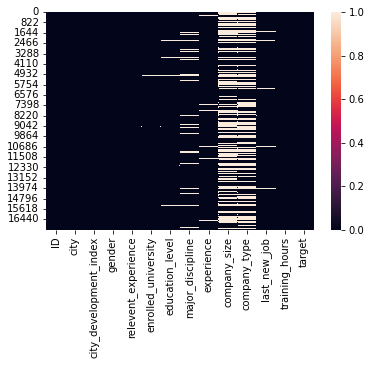

In [6]:
sns.heatmap(data.isnull())

#### We shall drop the feature if it has more than 25-30% empty values. 

In [7]:
for col in data.columns:
    percent = (data[col].isnull().sum()*100)/len(data) # instead of len(data) you can also use data.shape[0]
    if percent>30:
        print(f"{col} contains {percent}% empty values")

company_size contains 44.35301616735238% empty values
company_type contains 42.156805933823954% empty values


In [8]:
data.drop(["company_size","company_type","ID"],axis=1,inplace=True)

In [9]:
data.isnull().sum()

city                         0
city_development_index       0
gender                       0
relevent_experience          0
enrolled_university        251
education_level            295
major_discipline          1816
experience                  96
last_new_job               329
training_hours               0
target                       0
dtype: int64

<AxesSubplot:>

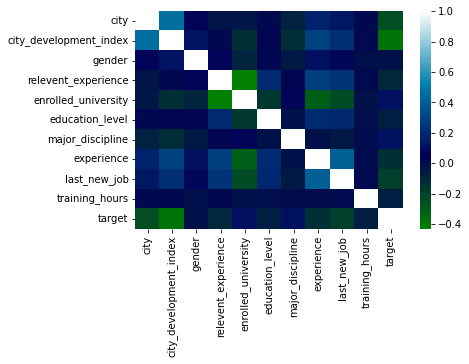

In [43]:
sns.heatmap(data.corr(),cmap="ocean")

In [44]:
check_feature_relation = ["experience","training_hours","last_new_job","city_development_index","enrolled_university"]

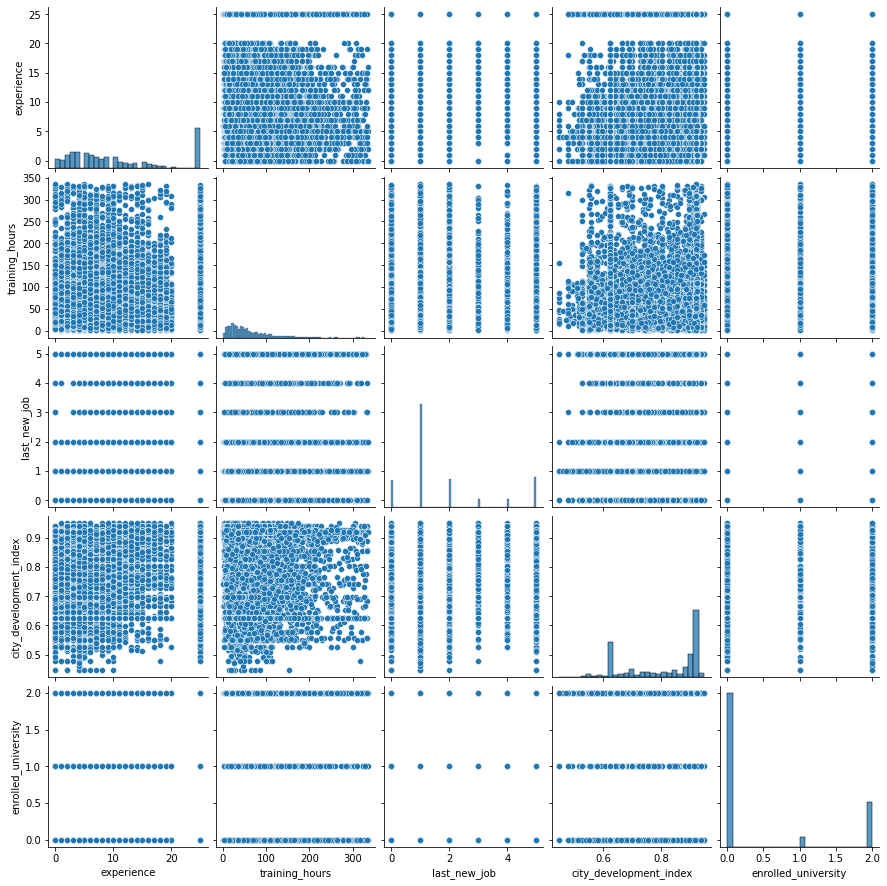

In [45]:
sns.pairplot(data[check_feature_relation])

In [46]:
fig = ex.histogram(data,marginal="box",x="training_hours",color="target")
fig.update_layout(bargap=0.2)

As noticed in data.describe() method, education level has the same value for quartile range, so we will fill the empty values with median value. 

In [47]:
data.education_level.fillna(3.0,inplace=True)

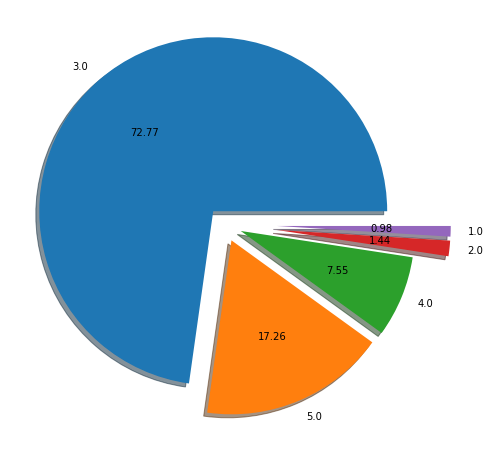

In [48]:
plt.figure(figsize=(15,8))
plt.pie(data['education_level'].value_counts(),labels=data['education_level'].unique(),shadow=True,autopct="%.2f",explode=[0.1,0.1,0.1,0.3,0.3])
plt.show()

<AxesSubplot:xlabel='gender', ylabel='count'>

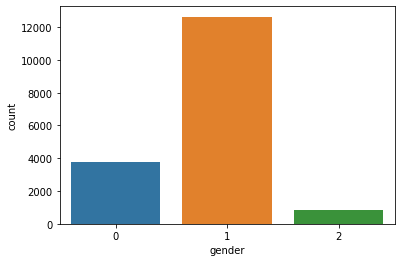

In [49]:
sns.countplot(data=data,x="gender")

In [50]:
data['relevent_experience'].unique()

array([0, 1])

<AxesSubplot:xlabel='target', ylabel='count'>

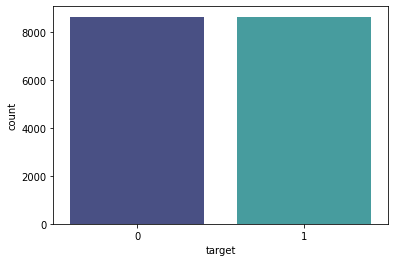

In [51]:
sns.countplot(data=data,x="target",palette="mako")

In [52]:
fig = ex.histogram(data,marginal="box",x="city_development_index",color="target")
fig.update_layout(bargap=0.2)

In [20]:
from sklearn.tree import plot_tree,DecisionTreeClassifier

In [53]:
feature_selection = ["experience","training_hours","last_new_job","city","relevent_experience"]

In [54]:
X = data[feature_selection]
X_copy = X.copy()
Y = data.target
Y_copy = Y.copy()

In [55]:
X.fillna(method="ffill",inplace=True)

In [56]:
mms = MinMaxScaler()
X = mms.fit_transform(X)

In [57]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [77]:
model = DecisionTreeClassifier(max_depth=15,max_features=5,splitter="best",criterion="gini")
model = model.fit(x_train,y_train)

```
Note: 
    max_depth, max_features and so on are Hyperparameters, you need to give different values and check for which data your models good. We shall see about Hyperparameter after 2 days
```

In [78]:
class_names = ['0','1']

In [73]:
plt.figure(figsize=(20,15))
plot_tree(model,
          feature_names=X_copy.columns,
          class_names=class_names,
          filled=True)
plt.show()

KeyboardInterrupt: 

Based on the `gini` index computations, a decision tree assigns an "importance" value to each feature. These values can be used to interpret the results given by a decision tree.

In [79]:
model.feature_importances_

array([0.1411685 , 0.29649199, 0.07614087, 0.45426928, 0.03192936])

In [80]:
feat_importance_df = pd.DataFrame({
    'features': X_copy.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

In [81]:
feat_importance_df

features  importance
3                 city    0.454269
1       training_hours    0.296492
0           experience    0.141169
2         last_new_job    0.076141
4  relevent_experience    0.031929

Exporting Decision Tree to the text representation can be useful

In [82]:
from sklearn import tree

explore_decision_tree = tree.export_text(model)
print(explore_decision_tree)

|--- feature_3 <= 0.12
|   |--- feature_3 <= 0.11
|   |   |--- feature_3 <= 0.06
|   |   |   |--- feature_3 <= 0.05
|   |   |   |   |--- feature_1 <= 0.07
|   |   |   |   |   |--- feature_4 <= 0.50
|   |   |   |   |   |   |--- feature_1 <= 0.06
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- feature_1 >  0.06
|   |   |   |   |   |   |   |--- feature_3 <= 0.04
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- feature_3 >  0.04
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_4 >  0.50
|   |   |   |   |   |   |--- feature_1 <= 0.03
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- feature_1 >  0.03
|   |   |   |   |   |   |   |--- feature_1 <= 0.05
|   |   |   |   |   |   |   |   |--- feature_1 <= 0.03
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |--- feature_1 >  0.03
|   |   |   |   |   |   |   |   |   |--- feature_0 <= 0.36
|   |   |   |   |   |  

In [83]:
import graphviz
# DOT data
graph = tree.export_graphviz(model)

# Draw graph
graph_plot = graphviz.Source(graph, format="png") 
graph_plot

In [87]:
model.classes_

array([0, 1])

In [88]:
model.n_features_

5

In [89]:
predict = model.predict(x_test)

In [90]:
model.score(x_train,y_train)

0.8662803332126041

In [91]:
model.score(x_test,y_test)

0.7062572421784473

In [ ]:
We are 

### Evaluation Metrics

In [116]:
from sklearn.metrics import f1_score,accuracy_score,precision_score,recall_score,confusion_matrix

In [111]:
accuracy = accuracy_score(y_true=y_test,y_pred=predict)

In [112]:
accuracy

0.7062572421784473

In [113]:
f1_score(predict,y_test)

0.7062572421784473

In [114]:
precision_score(y_true=y_test,y_pred=predict)

0.7013808975834293

In [115]:
recall_score(y_true=y_test,y_pred=predict)

0.7112018669778296

<AxesSubplot:>

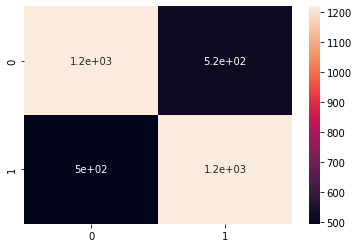

In [118]:
sns.heatmap(confusion_matrix(y_pred=predict,y_true=y_test),annot=True)